In [4]:
pip install numpy==1.26.0

  Using cached numpy-1.26.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (53 kB)
Using cached numpy-1.26.0-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --force-reinstall scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached numpy-2.2.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl (11.2 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-2.2.3-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl (22.4 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfu

In [6]:
pip install --upgrade setuptools


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install wandb


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**Section 1**

Step 1

Importing Required Libraries

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

Loading IRIS Dataset

In [11]:
iris = load_iris()
X = iris.data   #extracting features
y = iris.target  #extracting labels 

#printing raw labels
print(f"Raw Labels: \n {y[:10]}")

Raw Labels: 
 [0 0 0 0 0 0 0 0 0 0]


Applying One-Hot Encoding

In [12]:
#reshaping labels for one-hot encoding
y = y.reshape(-1, 1)
 
#one-hot encoding the labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

In [13]:
#printing one-hot encoded labels
print(f"One-Hot Encoded Labels: \n {y_onehot[:10]}")

One-Hot Encoded Labels: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Printing shapes of the original label and one-hot encoded labels

In [14]:
print(f"Original y shape: {y.shape}")
print(f"One-hot encoded y shape: {y_onehot.shape}")

Original y shape: (150, 1)
One-hot encoded y shape: (150, 3)


Splitting the dataset in 70% Training Set, 20% Testing Set, and 10% Validation Set

In [15]:
#first split is 70% training and 30% test+validation set
X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.3, random_state=42)

#second split is splitting 30% test+validation into 20% test and 10% validation set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

Dataset Statistics

In [16]:
print("Original dataset shape:", X.shape, y_onehot.shape)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Original dataset shape: (150, 4) (150, 3)
Training set shape: (105, 4) (105, 3)
Validation set shape: (15, 4) (15, 3)
Testing set shape: (30, 4) (30, 3)


In [17]:
#normalizing feature values to [0, 1] using standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Step 2 : Defining and Training the Model

In [18]:
#defining the MLP model
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),     #hidden layer
    Dense(3, activation='softmax')                      #output layer
])

#compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#training the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    batch_size=32, 
                    epochs=50, 
                    verbose=1)

/Users/shreya/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1679 - loss: 1.0637 - val_accuracy: 0.4000 - val_loss: 1.0561
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1859 - loss: 1.0359 - val_accuracy: 0.3333 - val_loss: 1.0324
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2119 - loss: 1.0057 - val_accuracy: 0.4000 - val_loss: 1.0097
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3000 - loss: 0.9817 - val_accuracy: 0.4667 - val_loss: 0.9880
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4183 - loss: 0.9520 - val_accuracy: 0.5333 - val_loss: 0.9676
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4665 - loss: 0.9375 - val_accuracy: 0.4667 - val_loss: 0.9480
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6098 - loss: 0.9092 - val_accuracy: 0.5333 - val_loss: 0.9285
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6424 - loss: 0.8769 - val_accuracy: 0.4667 - val_loss: 0.9090


Step 3 : Evaluate Model Performance

In [19]:
#evaluating the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [20]:
#computing the metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

Print Metrics

In [21]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9
Precision: 0.9272727272727274
Recall: 0.9
F1-score: 0.8912280701754386


Plotting Confusion Matrix

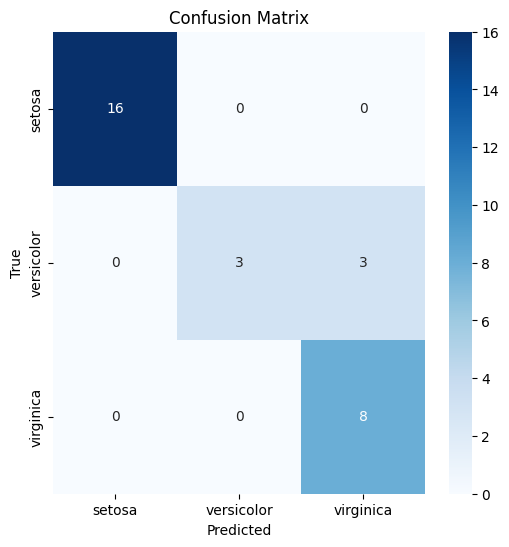

In [22]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Plotting train and validation loss curves

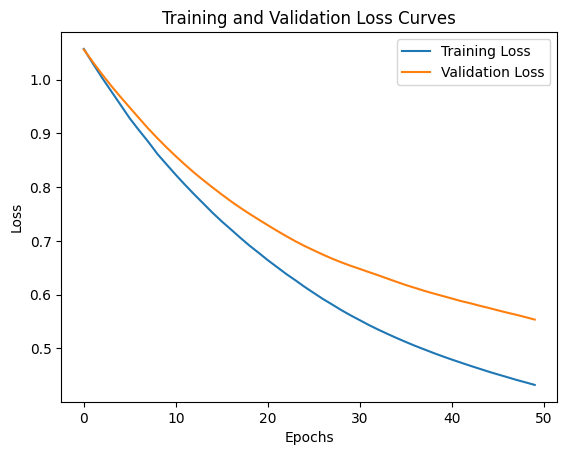

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Step 4 : Set Up Experiment Tracking with Weights & Biases (W&B) 

In [24]:
wandb_api_key = "c3095ada488aa1380a09d3c1f47ffb1689bf3ee6"
wandb.login(key=wandb_api_key)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [25]:
#initializing W&B
wandb.init(project="cs203-lab6", config={
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50,
    "architecture": "MLP",
    "dataset": "Iris"
})

#logging model architecture and hyperparameters
wandb.config.update({
    "layers": [4, 16, 3],
    "activations": ["relu", "softmax"]
})

#logging metrics
wandb.log({
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1
})

#logging confusion matrix
wandb.log({"confusion_matrix": wandb.plot.confusion_matrix(
    y_true=y_test_classes,
    preds=y_pred_classes,
    class_names=iris.target_names
)})

#logging loss curves
for epoch in range(len(history.history['loss'])):
    wandb.log({
        "epoch": epoch,
        "training_loss": history.history['loss'][epoch],
        "validation_loss": history.history['val_loss'][epoch]
    })

#finish W&B run
wandb.finish()

accuracy,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
f1_score,▁
precision,▁
recall,▁
training_loss,██▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
validation_loss,██▇▇▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
accuracy,0.9
epoch,49
f1_score,0.89123
precision,0.92727
